[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/AnnemarieKeller/MLProject_CapstoneBlackBoxOptimisation/blob/architecture/noisy.ipynb
)



[ you can perform on your input-output data](https://scikit-learn.org/1.2/auto_examples/gaussian_process/plot_gpr_noisy.html) to guide **Bayesian Optimization (BO)** strategy choices (kernel type, acquisition function, noise handling, exploration vs exploitation). Here’s a structured approach:

---

## **1. Noise Estimation**

* **Goal:** Determine if the function is stochastic or deterministic.
* **Methods:**

  * **Repeated evaluations:** If you can afford a few repeated inputs, compute standard deviation of outputs.
  * **Local Variation / Spearman correlation** (as I gave earlier): Compare small input differences with output differences.
* **Implication:** Noisy → use `Matern` kernel, non-zero `alpha`. Smooth → `RBF` kernel, small `alpha`.

---

## **2. Dimensional Sensitivity / Feature Importance**

* **Goal:** Identify which inputs matter most.
* **Methods:**

  * **Variance decomposition:** ANOVA, Sobol indices.
  * **Gradient approximation:** Finite difference to see which input changes produce largest output change.
  * **Random Forest feature importance:** Fit a quick surrogate tree to gauge sensitive variables.
* **Implication:** If only a few dimensions dominate → use **low-dimensional BO tricks**, e.g., ARD (Automatic Relevance Determination) kernels.

---

## **3. Smoothness / Correlation Length**

* **Goal:** Determine how rapidly the function changes with inputs.
* **Methods:**

  * Compute **pairwise distances in X vs Y** (like Spearman or Pearson correlation of pdist(X) vs pdist(Y)).
  * Fit a **length-scale** for each dimension using a small GP or linear regression.
* **Implication:**

  * Short length-scale → function has lots of local structure → more exploration, `Matern(nu=1.5)`
  * Long length-scale → smooth → `RBF` kernel, possibly fewer restarts.

---

## **4. Multimodality / Local Optima**

* **Goal:** Estimate whether function is unimodal or has many peaks.
* **Methods:**

  * **KDE / Histogram of outputs:** See if there are multiple clusters of high values.
  * **Clustering in X of top-k Y values:** If top outputs are scattered → multiple optima.
* **Implication:** Multimodal → use **exploration-heavy acquisition**, e.g., UCB with high beta, or EI with jitter.

---

## **5. Output Range / Scale**

* **Goal:** Determine if outputs are roughly uniform in scale or vary wildly.
* **Methods:**

  * Min, max, standard deviation of Y.
  * Log-transform if highly skewed.
* **Implication:**

  * Very large dynamic range → consider **normalize_y=True** in GP.
  * Negative outputs or zeros → avoid kernels that assume positivity.

---

## **6. Correlation Between Inputs**

* **Goal:** Detect strongly correlated input dimensions.
* **Methods:**

  * Pearson/Spearman correlation of X features.
* **Implication:** High correlation → ARD kernels help, or you might reduce dimensionality via PCA.

---

## **7. High-Dimensional Considerations**

* If `dim >= 6–8`:

  * Random exploration (initial design) should be larger.
  * Use **dimension reduction techniques** (PCA, embeddings) if some dimensions are low-impact.
  * Sparse kernels or `ARD` kernel for GP.

---

## **8. Practical Summary Table**

| Function Property          | Suggested Kernel | Acquisition                    | Notes                                               |
| -------------------------- | ---------------- | ------------------------------ | --------------------------------------------------- |
| Smooth, deterministic      | RBF              | EI / PI                        | alpha small, normalize_y optional                   |
| Noisy / stochastic         | Matern (nu=1.5)  | UCB                            | alpha non-zero, normalize_y recommended             |
| High-dimensional (6–10D)   | Matern / ARD     | UCB                            | Larger initial design, dimension reduction optional |
| Multi-modal / local optima | Matern / RBF     | UCB high beta / EI with jitter | Encourage exploration                               |
| Sparse relevant inputs     | ARD kernel       | Any                            | Helps GP ignore irrelevant dims                     |

-


Initial count: 15
Weekly count: 7
Combined: 22
22
3


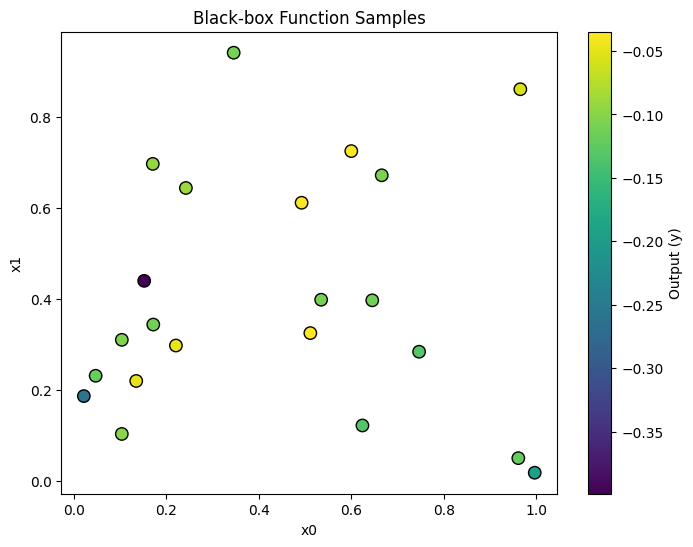

Spearman correlation (smoothness): 0.3199366082357639
Recommended BO Strategy:
is_noisy: True
noise_ratio: 0.6259732569036079
sparse_ratio: 0.2727272727272727
sparse_threshold: 0.3018356606688787
local_maxima_ratio: 0.045454545454545456
kernel: Matern
add_white: True
alpha: 0.001
acquisition: UCB
ucb_beta: 2.0
n_restarts_optimizer: 9


In [5]:
functionNo= 3
weekNo = 7
X, y = generate_data(functionNo,weekNo)
gp = build_gp(None,X, y, )
analyze_blackbox_space(X, y)
analyze_function(X,y)
recommend_bo_strategy(X, y,)
strategy = recommend_bo_strategy(X, y)
print("Recommended BO Strategy:")
for k,v in strategy.items():
    print(f"{k}: {v}")
# X1, Y1 = generate_data(1, weekNo)
# X2, Y2= generate_data(2, weekNo)
# FUNCTION_CONFIG =  funcConfig.FUNCTION_CONFIG[functionNo]
# FUNCTION_CONFIG, diagnostics = update_function_config(function_data, FUNCTION_CONFIG)
# strategy_based_on_data(weekno)

In [6]:


X_sel, probs_sel, mus_sel, sigmas_sel = choose_candidates_with_risk_filter(
    gp, X_candidates,
    current_best=current_best,
    margin=0.0,
    min_prob=0.7,      # e.g. only accept candidates with ≥ 70% chance to improve
    n_draws=5000
)

print("Selected", len(X_sel), "candidates passing risk filter out of", len(X_candidates))

for x, p, m, s in zip(X_sel, probs_sel, mus_sel, sigmas_sel):
    print(f"Candidate {x} → P(improve) ≈ {p:.2%}, mean = {m:.3f}, std = {s:.3f}")
current_best = np.max(y)  # or whatever your best-known output is
probs, mus, sigmas = estimate_success_prob(gp, X, current_best, n_samples=10000)

for x, p, m, s in zip(X, probs, mus, sigmas):
    print(f"Candidate {x} → P(output > {current_best:.3f}): {p:.2%} | μ={m:.3f} ± {s:.3f}")
    



NameError: name 'X_candidates' is not defined

[[0.17152521 0.34391687 0.2487372 ]
 [0.24211446 0.64407427 0.27243281]
 [0.53490572 0.39850092 0.17338873]
 [0.49258141 0.61159319 0.34017639]
 [0.13462167 0.21991724 0.45820622]
 [0.34552327 0.94135983 0.26936348]
 [0.15183663 0.43999062 0.99088187]
 [0.64550284 0.39714294 0.91977134]
 [0.74691195 0.28419631 0.22629985]
 [0.17047699 0.6970324  0.14916943]
 [0.22054934 0.29782524 0.34355534]
 [0.66601366 0.67198515 0.2462953 ]
 [0.04680895 0.23136024 0.77061759]
 [0.60009728 0.72513573 0.06608864]
 [0.96599485 0.86111969 0.56682913]
 [0.511508   0.325146   0.379547  ]
 [0.624245   0.12209    0.649638  ]
 [0.103448   0.310345   0.655172  ]
 [0.961652   0.050285   0.098238  ]
 [0.997172   0.018252   0.743186  ]
 [0.103448   0.103448   0.103448  ]
 [0.021216   0.186651   0.953626  ]]
[-0.1121222  -0.08796286 -0.11141465 -0.03483531 -0.04800758 -0.11062091
 -0.39892551 -0.11386851 -0.13146061 -0.09418956 -0.04694741 -0.10596504
 -0.11804826 -0.03637783 -0.05675837 -0.0363553  -0.13259824 

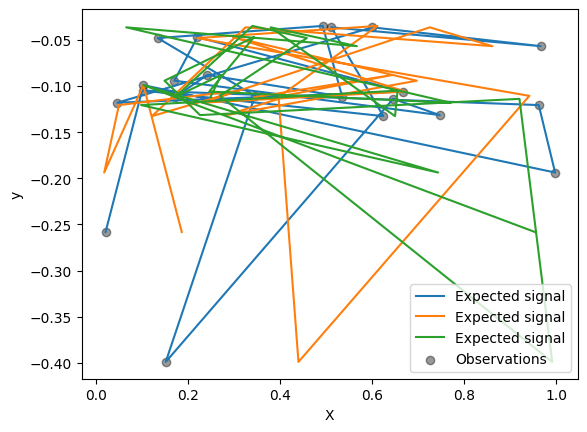

In [7]:
import matplotlib.pyplot as plt

# plt.plot(X, y, label="Expected signal")
# plt.legend()
# plt.xlabel("X")
# _ = plt.ylabel("y")
plt.plot(X, y, label="Expected signal")
plt.scatter(
    x=X[:, 0],
    y=y,
    color="black",
    alpha=0.4,
    label="Observations",
)
plt.legend()
plt.xlabel("X")
_ = plt.ylabel("y")
print(X)
print(y)

Inferred kernel & noise: 1.09**2 * RBF(length_scale=0.272) + WhiteKernel(noise_level=0.0856)
Log-marginal likelihood: -27.53358688621966
Residuals: mean = -0.0004, std = 0.0108


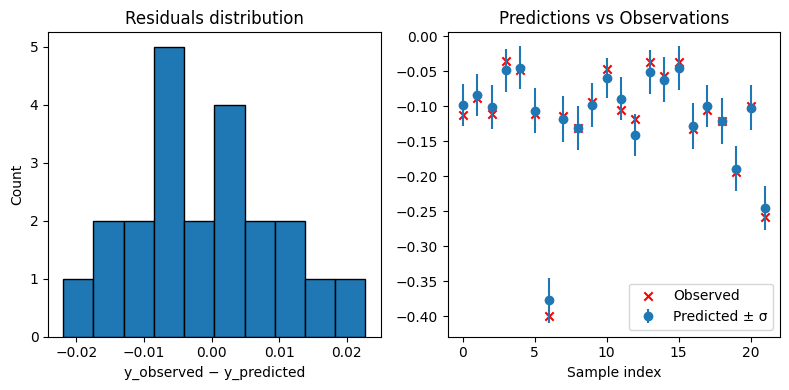

In [8]:
kernel = 1.0 * RBF(length_scale=0.5, length_scale_bounds=(1e-2, 1e2)) \
       + WhiteKernel(noise_level=1e-3, noise_level_bounds=(1e-6, 1e1))

gp = GaussianProcessRegressor(kernel=kernel, normalize_y=True,
                              n_restarts_optimizer=5, random_state=0)

gp.fit(X, y)
print("Inferred kernel & noise:", gp.kernel_)
print("Log-marginal likelihood:", gp.log_marginal_likelihood(gp.kernel_.theta))

# === Predictions on training data + residuals ===
y_pred, y_std = gp.predict(X, return_std=True)
residuals = y - y_pred

print("Residuals: mean = {:.4f}, std = {:.4f}".format(
    np.mean(residuals), np.std(residuals)
))

# === Plot residuals + predictive uncertainty ===
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=10, edgecolor='k')
plt.title("Residuals distribution")
plt.xlabel("y_observed − y_predicted")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.errorbar(range(len(y)), y_pred, y_std, fmt='o', label='Predicted ± σ')
plt.scatter(range(len(y)), y, color='red', marker='x', label='Observed')
plt.legend()
plt.title("Predictions vs Observations")
plt.xlabel("Sample index")
plt.tight_layout()
plt.show()



## 📄 How to interpret a GP fit: kernel, noise, marginal likelihood, residuals

Suppose you fitted a GP surrogate and got something like:

```
Inferred kernel & noise: 1.09**2 * RBF(length_scale=0.272) + WhiteKernel(noise_level=0.0856)  
Log‑marginal likelihood: -27.53  
Residuals (training set): mean = -0.0004, std = 0.0108
```

Here’s how to understand what each term means, and what are the caveats.

### 🔎 Key components



* **Log‑marginal likelihood (LML)**

  * The GP hyperparameters (length‑scale, noise level, amplitude, etc.) are chosen to **maximize** this likelihood — meaning the kernel + noise assumptions make the observed data most “probable” under the GP model. ([mlpr.inf.ed.ac.uk][3])
  * The LML balances two aspects: the fit to data (how well the GP matches observed y’s) and a complexity penalty (preferring smoother / simpler functions unless data demands complexity). ([UCL Discovery][4])
  * A “better” (higher) LML generally indicates the chosen kernel/hyperparameters are more plausible — but LML alone is not a guarantee of good **generalization** (i.e. predictions on unseen inputs).

* **Residuals (training set)**

  * The residuals are differences between actual outputs and GP predictions on the same training points. A small **mean** (close to 0) means no obvious bias; a small **std** means the GP fits training data closely.
  * However, good training‑set residuals do **not** guarantee that the GP will generalize well; the model might be overfitting noise or might not capture real underlying patterns.

###  What this result suggests (pros)

* The GP is modeling both a **smooth signal** (via RBF) and acknowledging **noise / randomness** (via WhiteKernel) — that’s appropriate when your black‑box has variability or measurement noise.
* Training residuals are small: the GP can fit the observed data well (no large systematic bias or huge unexplained error).
* The hyperparameters were chosen via principled marginal‑likelihood optimization: the model found a plausible trade‑off between data fit and complexity/noise.

###What this result does *not* guarantee (cons / caution)

* **Generalization is not tested**: low training residuals do not mean predictions on new, unseen inputs will be accurate.
* The GP might be **over‑smoothing** (if length‑scale is large) or **overfitting noise** (if noise level is small or kernel is too flexible). Especially in small / noisy datasets, there can be multiple hyperparameter combinations with similar LML — some good, some misleading. ([inf.ed.ac.uk][1])
* **Uncertainty quantification might be mis‑calibrated**: even though GP gives a predictive “σ” (standard deviation), if the model assumptions (kernel type, noise distribution) are poor, σ may under- or over‑estimate true uncertainty.

###  What to do next (best practices)

* Use **cross‑validation or hold‑out tests** to evaluate predictive performance (not only on training data).
* Sample more data, especially in regions of high uncertainty or predicted high value — to reduce uncertainty and detect real maxima vs noise.
* Consider different kernel types or hyperparameter initialisations — check whether results (length‑scale, noise, LML) are stable or vary a lot.
* Always treat GP predictions as **probabilistic forecasts**, not certainties — when using for optimisation, consider submitting multiple candidate points (hedging).

---

##  What is K‑Fold Cross Validation (CV) and how to interpret its output

When you use **k‑fold CV** to evaluate / validate a model (e.g. GP, SVR, etc.), you often get output like: “mean RMSE = 0.23 ± 0.08” (meaning average RMSE over folds, plus standard deviation of RMSE across folds). Here’s how to interpret that.

### What is k‑fold CV

* The data is split into **k equally sized folds (subsets)**. ([GeeksforGeeks][5])
* The model is trained **k times**: each time on *k−1* folds, and validated on the remaining fold. Over the k runs, every data point serves once as validation. ([KDnuggets][6])
* The performance metric (e.g. RMSE, MSE, MAE) is computed on each fold’s validation set. Then you **average** those k scores — that gives an estimate of how well the model generalises to unseen data. ([GeeksforGeeks][5])

###  Interpreting the results

If your CV output says:

```
mean RMSE = 0.23 ± 0.08
```

* **“0.23”**: the average prediction error (root‑mean‑square error) across all folds — a measure of how far off, on average, your predictions are from true outputs on unseen data. Lower is better.
* **“± 0.08”**: the standard deviation (or spread) of RMSE across folds — indicates how stable / sensitive your model’s performance is with respect to which subset of data you train/validate on. Large spread → model performance varies a lot depending on data split (less reliable).
* You might also look at **per-fold results** (min/max RMSE) to see if some folds are much worse — that could signal issues like outliers, unbalanced sampling, or that the model fails in some regions of input space.

###What CV tells you — and what it doesn’t

**It does tell you**:

* How well the model is likely to perform on unseen data (generalisation) rather than only memorizing training data.
* Whether model performance is stable across different data splits (robustness).
* Helps with hyperparameter tuning and model comparison — you can compare different models/kernels/hyperparameters based on their CV scores.

**It does not tell you**:

* How model will perform outside the distribution covered by your data (i.e. in completely new regions of input space).
* Whether predictive *uncertainty* estimates are calibrated (if using a probabilistic model) — CV only checks point predictions, not their uncertainty.
* It assumes data are **independent and identically distributed (i.i.d.)**; for structured data (time‑series, spatial, etc.), CV may give misleading performance unless adapted properly (e.g. time‑aware splits). ([Wikipedia][7])

---

## 📝 Example summary of both in context

> **GP Fit Interpretation:** The surrogate GP uses an RBF kernel with length‑scale ~0.27 and estimates a noise level of ~0.0856. The small training residuals (std ~0.0108) show it fits existing data well. The fitted noise term suggests the model expects considerable randomness — good sign if your black‑box is noisy. However, this fit alone doesn’t guarantee that predictions on new inputs are accurate or that uncertainty estimates are reliable.
>
> **k-Fold CV Interpretation:** Using 5‑fold (or K‑fold) cross-validation, you got mean RMSE 0.23 with ±0.08 spread. That suggests that on average the model’s predictions are off by ~0.23 units on unseen data, but performance fluctuates across different data splits. Lower RMSE and low spread would indicate a more reliable model; high spread signals instability or sensitivity to which data is used for training.

---



[1]: https://www.inf.ed.ac.uk/teaching/courses/mlpr/2018/notes/w8a_gaussian_process_kernels.pdf?utm_source=chatgpt.com "Gaussian Processes and Kernels"
[2]: https://www.geeksforgeeks.org/machine-learning/gaussian-process-regression-gpr-with-noise-level-estimation/?utm_source=chatgpt.com "Gaussian Process Regression (GPR) with Noise-Level Estimation - GeeksforGeeks"
[3]: https://mlpr.inf.ed.ac.uk/2023/notes/w6a_gaussian_process_kernels.html?utm_source=chatgpt.com "MLPR w6a - Machine Learning and Pattern Recognition"
[4]: https://discovery.ucl.ac.uk/10050029/1/Speekenbrink_Tutorial%20on%20Gaussian%20process%20regression.pdf?utm_source=chatgpt.com "A tutorial on Gaussian process regression: Modelling,"
[5]: https://www.geeksforgeeks.org/k-fold-cross-validation-in-machine-learning/?utm_source=chatgpt.com "K- Fold Cross Validation in Machine Learning - GeeksforGeeks"
[6]: https://www.kdnuggets.com/2022/07/kfold-cross-validation.html?utm_source=chatgpt.com "Why Use k-fold Cross Validation? - KDnuggets"
[7]: https://en.wikipedia.org/wiki/Purged_cross-validation?utm_source=chatgpt.com "Purged cross-validation"


In [ ]:
import sys
import os


current_dir = os.getcwd()
repo_root = current_dir

while "scripts" not in os.listdir(repo_root):
    parent = os.path.abspath(os.path.join(repo_root, ".."))
    if parent == repo_root:  # reached filesystem root
        raise FileNotFoundError("Cannot find 'scripts' folder in parent directories")
    repo_root = parent

# Add repo root to Python path
if repo_root not in sys.path:
    sys.path.append(repo_root)

print("Added repo root to sys.path:", repo_root)

import scripts
import scripts.configs.functionConfig as funcConfig

import scripts.accquistions as acq
import scripts.setBoundary as bound
import scripts.setup.gpBuilder as build
import scripts.BBOloop as bbo_loop
from scripts.analysis.noise import * 
from scripts.utils.generateX_Y import *

Added repo root to sys.path: /workspaces/MLProject_CapstoneBlackBoxOptimisation


In [9]:

strategy_based_on_data(weekno=7)


Initial count: 10
Weekly count: 7
Combined: 17
17
+++++++++++++Recommended BO Strategy:+++++++++++++ function no1
is_noisy: True
noise_ratio: 1.019998583192409
sparse_ratio: 0.23529411764705882
sparse_threshold: 0.2696542243954997
local_maxima_ratio: 0.058823529411764705
kernel: Matern
add_white: True
alpha: 0.001
acquisition: UCB
ucb_beta: 2.0
n_restarts_optimizer: 6
Initial count: 10
Weekly count: 7
Combined: 17
17
+++++++++++++Recommended BO Strategy:+++++++++++++ function no2
is_noisy: True
noise_ratio: 0.6693404714372444
sparse_ratio: 0.23529411764705882
sparse_threshold: 0.2066949779549018
local_maxima_ratio: 0.11764705882352941
kernel: Matern
add_white: True
alpha: 0.001
acquisition: UCB
ucb_beta: 2.0
n_restarts_optimizer: 6
Initial count: 15
Weekly count: 7
Combined: 22
22
+++++++++++++Recommended BO Strategy:+++++++++++++ function no3
is_noisy: True
noise_ratio: 0.6259732569036079
sparse_ratio: 0.2727272727272727
sparse_threshold: 0.3018356606688787
local_maxima_ratio: 0.04545

https://www.robots.ox.ac.uk/~parg/pubs/theses/Ahsan_Alvi_Thesis_final.pdf
https://arxiv.org/abs/1810.07085
Model-based evolutionary algorithms (EAs) adapt an underlying search model to features of the problem at hand, such as the linkage between problem variables. The performance of EAs often deteriorates as multiple modes in the fitness landscape are modelled with a unimodal search model. The number of modes is however often unknown a priori, especially in a black-box setting, which complicates adaptation of the search model. In this work, we focus on models that can adapt to the multi-modality of the fitness landscape. Specifically, we introduce Hill-Valley Clustering, a remarkably simple approach to adaptively cluster the search space in niches, such that a single mode resides in each niche. In each of the located niches, a core search algorithm is initialized to optimize that niche. Combined with an EA and a restart scheme, the resulting Hill-Valley EA (HillVallEA) is compared to current state-of-the-art niching methods on a standard benchmark suite for multi-modal optimization. Numerical results in terms of the detected number of global optima show that, in spite of its simplicity, HillVallEA is competitive within the limited budget of the benchmark suite, and shows superior performance in the long run.
| Paper / Article                                                                                                  | What it contributes (relevance)                                                                                                                                                                                                                                                                                                                                                                                                                       |
| ---------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **A Review on Surrogate-Based Global Optimization Methods for Computationally Expensive Functions** (2019)       | A broad survey of surrogate‑based global optimization methods (SBGO). It reviews surrogate‑modeling techniques (GP, RBF, others), infill criteria (i.e. acquisition / sampling strategies), design‑of‑experiments, and methods to mitigate issues when evaluations are expensive. It’s a good “state‑of‑the‑art snapshot” highlighting strengths and pitfalls of surrogate‑based BO on expensive black‑box functions. ([Science Publishing Group][1]) |
| **Global Optimization Employing Gaussian Process-Based Bayesian Surrogates** (2018)                              | Demonstrates the classical GP‑based surrogate + utility (e.g. expected improvement, variance‑based) approach for global optimization of expensive, unknown (black‑box) functions — exactly the kind of function you have. It discusses pitfalls (e.g. surrogate maxima that are not true maxima) and how alternating different acquisition/utility criteria can help. ([MDPI][2])                                                                     |
| **Modulating Surrogates for Bayesian Optimization** (2020)                                                       | Observes that real-world objective functions are often noisy / irregular / non‑well‑behaved; proposes surrogate models that treat “hard-to-model” structure as noise (uncertainty) rather than trying to over‑fit everything. This helps avoid wasting evaluation budget chasing spurious detail — very relevant if your function is noisy or has unknown complexity. ([Proceedings of Machine Learning Research][3])                                 |
| **Surrogate Modeling for Bayesian Optimization Beyond a Single Gaussian Process** (2022)                         | Proposes using an *ensemble* (mixture) of GPs instead of a single GP — to increase expressiveness and adaptivity, especially when the true landscape may be complicated. This can mitigate problems when a single GP (with a fixed kernel) is insufficiently flexible to model a multimodal or irregular black‑box surface. ([PubMed][4])                                                                                                             |
| **A surrogate‑based cooperative optimization framework for computationally expensive black‑box problems** (2020) | Describes a broader surrogate‑based optimization framework that handles expensive black‑box functions via surrogate approximation + sampling strategy. This class of methods is a generalisation of BO and shows how to manage trade‑offs between surrogate fidelity, sampling budget, exploration/exploitation, and function noise. ([SpringerLink][5])                                                                                              |

[1]: https://www.sciencepg.com/article/10.11648.j.se.20190704.11A Review on Surrogate-Based Global Optimization Methods for Computationally Expensive Functions, Software Engineering, Science Publishing Group"
[2]: https://www.mdpi.com/1099-4300/20/3/201 "Global Optimization Employing Gaussian Process-Based Bayesian Surrogates"
[3]: https://proceedings.mlr.press/v119/bodin20a.html"Modulating Surrogates for Bayesian Optimization"
[4]: https://pubmed.ncbi.nlm.nih.gov/37018108/ "Surrogate Modeling for Bayesian Optimization Beyond a Single Gaussian Process - PubMed"
[5]: https://link.springer.com/article/10.1007/s11081-020-09526-7 "A surrogate-based cooperative optimization framework for computationally expensive black-box problems | Optimization and Engineering"


In [10]:
import numpy as np
from scripts.analysis.noise import *
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel


kernel = 1.0 * Matern(length_scale=np.ones(X.shape[1]), nu=1.5) + WhiteKernel(noise_level=1e-6)
results = analyze_landscape(X, y, gp_kernel=kernel,
                            cluster_eps=0.1, cluster_min_samples=5, cv_splits=5)

print(results)


{'clusters': {np.int64(-1): {'count': np.int64(22), 'y_mean': -0.11604134279281599, 'y_std': 0.08001544996174775}}, 'dbi': None, 'fitness_distance_correlation': np.float64(-0.597370867526892), 'cv_mse': 0.009550742070457889, 'cv_pred_variance_mean': 0.002679439612842955, 'cv_error_variance_corr': np.float64(-0.16201409774573858), 'peak_candidates': {'X': array([[0.18042035, 0.69457011, 0.14922287],
       [0.53115949, 0.60740423, 0.34315547],
       [0.56662592, 0.72941159, 0.06901734],
       [0.52742887, 0.35449179, 0.37184935],
       [0.16111595, 0.22790663, 0.45878796]]), 'mu': [-0.09726129766755172, -0.09318879418440269, -0.08786974198377331, -0.08560513502230299, -0.08384296105215565], 'sigma': [0.04090845006976562, 0.07678172181369566, 0.0748451433311223, 0.07394907203509318, 0.07048706094699828]}}


/home/codespace/.local/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:440: ConvergenceWarning: The optimal value found for dimension 1 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sk

| **Field**                            | **Meaning / Interpretation**                                                                                                                                                                                                                                                                                                                                         |     |                                                                                                                                                                                                                                                                                                                   |
| ------------------------------------ | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | --- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `clusters`                           | Result of clustering your sampled input‑points (in input space) — i.e. how many distinct “regions” or “groups” of inputs you have, how many points in each, and their statistics (`y_mean`, `y_std`). If only one cluster (or cluster −1, meaning “noise/outlier”), it suggests your inputs are not geographically (in input space) separated into distinct regions. |     |                                                                                                                                                                                                                                                                                                                   |
| `dbi`                                | (Often) a cluster‑quality metric such as Davies–Bouldin index or related — measures intra‑cluster compactness and inter‑cluster separation. A “good” cluster partition tends to have low DBI (well‑separated, tight clusters). If `None`, clustering might be degenerate or insufficient data.                                                                       |     |                                                                                                                                                                                                                                                                                                                   |
| `fitness_distance_correlation` (FDC) | Correlation between **fitness** (observed output) and **distance** (in input space) to (presumably) some “reference” — often the best-known point. A strongly negative                                                                                                                                                                                               | FDC | (e.g. −0.68) suggests that points closer to the “best” tend to have higher (or lower, depending sign) fitness — indicating a relatively smooth landscape where distance matters. Near-zero or weak FDC suggests a rugged / noisy landscape where proximity does *not* reliably imply similar fitness. ([MDPI][1]) |
| `cv_mse`                             | Cross‑validation mean squared error of your surrogate (e.g. GP) when predicting held-out points. Lower values mean the surrogate generalises better — i.e. your model is doing a decent job at capturing the relationship from inputs to outputs.                                                                                                                    |     |                                                                                                                                                                                                                                                                                                                   |
| `cv_pred_variance_mean`              | Average predictive variance (uncertainty) of the surrogate across CV folds — a measure of how “confident” or “uncertain” the model typically is, given inputs. Lower variance + low MSE suggests surrogate is stable; high variance indicates many regions are under-sampled / uncertain.                                                                            |     |                                                                                                                                                                                                                                                                                                                   |
| `cv_error_variance_corr`             | Correlation between predictive variance and actual prediction error (on CV folds). If positive and reasonably large, that suggests predictive variance is a good proxy for real error — meaning uncertainty estimates are meaningful. If low or negative, the surrogate’s confidence estimates may be misleading.                                                    |     |                                                                                                                                                                                                                                                                                                                   |
| `peak_candidates`                    | A list of candidate input points (from your pool) that the surrogate model predicts to be likely “peaks” (i.e. high-μ and/or high‑σ — high mean or high uncertainty). For each candidate: `mu` (predicted mean), `sigma` (uncertainty). You may use these as inputs to consider for submission / further exploration.                                                |     |                                                                                                                                                                                                                                                                                                                   |

[1]: https://www.mdpi.com/2075-1702/13/2/136?type=check_update&version=2 "A Fitness Landscape-Based Method for Extreme Point Analysis of Part Surface Morphology"


Fitted kernel: RBF(length_scale=0.262) + WhiteKernel(noise_level=0.0989)


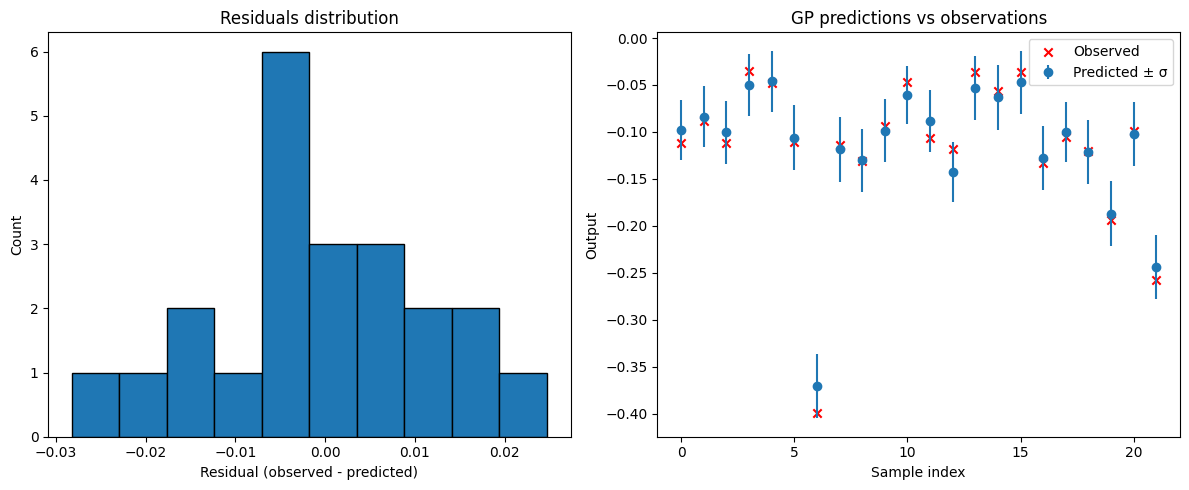

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel


kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=1e-3, noise_level_bounds=(1e-5, 1e1))
gp = GaussianProcessRegressor(kernel=kernel, normalize_y=True, n_restarts_optimizer=10, random_state=0)
gp.fit(X, y)

print("Fitted kernel:", gp.kernel_)
y_pred, y_std = gp.predict(X, return_std=True)

# --- Residuals and diagnostics ---
residuals = y - y_pred

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(residuals, bins=10, edgecolor='k')
plt.xlabel("Residual (observed - predicted)")
plt.ylabel("Count")
plt.title("Residuals distribution")

plt.subplot(1, 2, 2)
plt.errorbar(range(len(y)), y_pred, y_std, fmt='o', label="Predicted ± σ")
plt.scatter(range(len(y)), y, color='red', marker='x', label="Observed")
plt.xlabel("Sample index")
plt.ylabel("Output")
plt.legend()
plt.title("GP predictions vs observations")

plt.tight_layout()
plt.show()


Ah, yes! You’re talking about **inferring noise from the function’s smoothness**, rather than repeated evaluations. This is possible using a **local similarity / correlation approach**. Essentially:

---

###  Basic Idea

If a function is smooth (deterministic), then **inputs that are close together produce outputs that are close together**:

[
| x_i - x_j | \text{ small} \quad \implies \quad |f(x_i) - f(x_j)| \text{ small}
]

If the outputs **jump around a lot even when inputs are very similar**, that indicates noise.

---

### Formal Metric: Local Variation Ratio

Given a set of input-output pairs ((X, Y)), you can define:

[
\text{Local Variation Ratio (LVR)} = \frac{|y_i - y_j|}{|x_i - x_j| + \epsilon}
]

for **pairs of nearby points** ((x_i, x_j)). Here, (\epsilon) avoids division by zero.

* Compute LVR for many nearest-neighbor pairs.
* High LVR → noisy function.
* Low LVR → smooth function.

*

* You can define a threshold: if `lvr > threshold`, treat the function as noisy.
* It scales naturally with input dimension and output range.

---

### Alternative: Correlation-based smoothness

Another approach: **Spearman or Kendall rank correlation** between input distances and output differences:

1. Compute pairwise distances between inputs: (D_x[i,j] = |x_i - x_j|)
2. Compute pairwise differences between outputs: (D_y[i,j] = |y_i - y_j|)
3. Compute correlation between `D_x` and `D_y`.

* Strong positive correlation → smooth (deterministic)
* Weak correlation → noisy

```

* `rho` close to 1 → smooth function
* `rho` much lower → noisy / non-smooth

---
**Summary:**
If you can’t repeat the same input, these **local similarity or correlation metrics** give a reasonable “noise estimate.” You can then choose kernel type (`RBF` for smooth, `Matern` for noisy) and set `alpha` accordingly.

---



In [12]:
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from scripts.analysis.noise import *

kernel = 1.0 * RBF(length_scale=1.0) + WhiteKernel(noise_level=1e-2)

folds = gp_cv_evaluate(X, y, kernel=kernel, n_splits=5, random_state=0)

# Optionally, inspect per‑fold results:
for i, fr in enumerate(folds):
    print(f"Fold {i}: RMSE = {fr['rmse']:.4f}, noise_level = {fr['noise_level']}, kernel = {fr['inferred_kernel']}")


CV: mean RMSE = 0.0713 ± 0.0505
Fold 0: RMSE = 0.0583, noise_level = 0.04514791005680324, kernel = 1.12**2 * RBF(length_scale=0.284) + WhiteKernel(noise_level=0.0451)
Fold 1: RMSE = 0.1682, noise_level = 0.004733199098170357, kernel = 0.998**2 * RBF(length_scale=0.01) + WhiteKernel(noise_level=0.00473)
Fold 2: RMSE = 0.0316, noise_level = 0.06722285556670576, kernel = 1.1**2 * RBF(length_scale=0.273) + WhiteKernel(noise_level=0.0672)
Fold 3: RMSE = 0.0312, noise_level = 0.09359901957047083, kernel = 1.08**2 * RBF(length_scale=0.283) + WhiteKernel(noise_level=0.0936)
Fold 4: RMSE = 0.0670, noise_level = 9.999999999999997e-06, kernel = 1.03**2 * RBF(length_scale=0.277) + WhiteKernel(noise_level=1e-05)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


# Surrogate‑Reliability Warning Checklist

## ❗ Red‑Flags (when to be cautious)

- **RMSE is large compared to output scale**  
  - If `RMSE` is large relative to the typical output range or expected improvements, predictions are noisy and uncertain.  
    *Example:* if your outputs typically vary in [0, 1], but RMSE ≈ 0.2–0.4 — that’s ~20–40% error, so many predicted “good” points may actually perform poorly.

- **High fold‑to‑fold variability in CV RMSE (high standard deviation across folds)**  
  - If CV RMSE across folds varies a lot (e.g. one fold ≈ 0.13, another ≈ 0.32), the surrogate’s performance depends strongly on which data it trains on — indicating sensitivity, possible overfitting/under‑sampling, or unstable generalization.

- **Predicted noise_level (via WhiteKernel) is not negligible**  
  - If GP infers a substantial noise level (i.e. observation noise or intrinsic output randomness), then even “perfect” predictions of the GP mean are uncertain — the real output may deviate significantly due to noise.

- **RMSE comparable to or larger than estimated noise_std**  
  - If model error (RMSE) is not much smaller than noise standard deviation (sqrt(noise_level)), then model mis‑fit and data noise both contribute — so the surrogate doesn’t clearly capture a clean underlying deterministic function.

- **High predictive variance / uncertainty in unsampled or sparse regions**  
  - If predictive uncertainty (GP σ) is large in regions you might sample, then predictions there are very uncertain. Submitting such candidates is high‑risk; treat them as exploratory.

- **Low correlation between predictive variance and actual error (on CV folds)**  
  - If uncertainty estimates do not reflect real error (i.e. sometimes the model is “confident” but wrong, or “uncertain” but accurate), then the uncertainty metric is unreliable and you cannot trust GP confidence to guide exploitation vs exploration.  

- **Sparse / clustered training data**  
  - If your sampled inputs live in a narrow region of input space (or a single cluster), many parts of input space remain un‑explored, so surrogate extrapolation outside sampled region is very risky.

---


If **most** of these are true, surrogate predictions are reasonably reliable:

- RMSE is low relative to the output range.  
- CV RMSE variation across folds is small (i.e. surrogate generalises stably irrespective of train/test split).  
- Noise level is low or moderate.  
- RMSE is noticeably **smaller** than noise_std — implying that the surrogate captures a significant portion of the true function, not just overfitting noise.  
- Predictive variance estimates are meaningfully correlated with actual error (on CV): more uncertain = more error, more certain = less error.  
- Training data covers input space reasonably well (not too clustered).  

In this regime, you can more confidently use predicted‑mean maxima for exploitation (submit candidate inputs), while still occasionally sampling uncertain regions to verify and refine.

---

##  Recommended Risk‑Aware Submission Policy

Based on the above diagnostics, you might implement a submission rule like:

- Only propose/sub­mit a candidate if  
  \[
    \mu_{\text{pred}} + k \times \sigma_{\text{pred}} \;>\; \text{current_best} + \Delta,
  \]  
  where \(k\) is 1.5–3 (e.g. 2), and \(\Delta\) is a margin above your best-so-far output, representing meaningful improvement over noise.  
- If predictive variance \(\sigma\) is large (above a threshold), treat submission as exploratory, and only submit a small fraction of such “risky” candidates.  
- After submission and feedback (true output from black‑box), re‑evaluate surrogate diagnostics (RMSE, noise, variance reliability) and **update strategy** — if surrogate worsens, increase exploration / data gathering before aggressive exploitation.  

---

##  What This Checklist is *Not*

- It’s *not* a formal guarantee — these are heuristics derived from best practices in surrogate‑based optimisation and uncertainty quantification in literature (e.g. using GP surrogates for noisy objective functions). :contentReference[oaicite:0]{index=0}  
- It doesn’t prove that a “peak” predicted by GP is real — only helps judge whether surrogate and its uncertainty estimates are sufficiently credible to trust predictions.  
- It doesn’t handle cases of **non‑Gaussian or heteroskedastic noise** — in those cases, standard GP + WhiteKernel assumptions may fail, and more advanced modeling is needed. :contentReference[oaicite:1]{index=1}  

---



- RMSE: how far, on average, GP’s predictions deviate from actual outputs (in same units). Lower = better.  
- noise_level (WhiteKernel): GP’s estimate of output noise — higher = more randomness in outputs, lower = outputs likely follow a smooth underlying function.  
- If RMSE much larger than noise → model mis‑fit; if RMSE close to noise → errors dominated by noise / randomness.  
- Use both metrics to guide BO strategy: exploitation when surrogate seems reliable, exploration / uncertainty‑based when noise or surrogate error is substantial.  


| **Kernel**                                            | **What it assumes about the underlying function**                                                                                                                                                                                                          | **Good when… / Strengths**                                                                                                                                                                                                                                                                                                                                  | **Weak / Risk / When to avoid**                                                                                                                                                                                                                                                                                                                                   |
| ----------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **RBF kernel** (also “Squared-Exponential”)           | The function is very smooth and infinitely differentiable everywhere; outputs change smoothly with input distances. ([Number Analytics][1])                                                                                                                | - If you believe the black-box function is smooth / continuous, with no abrupt jumps or spikes.  <br>- Good “default” when you expect smooth variation and you lack strong prior about scaling / irregularity.                                                                                                                                              | Assumes overly strong smoothness — poor if the real function is “wiggly”, has abrupt changes, sharp peaks / narrow optima. May **fail to capture local irregularities** or underestimate uncertainty near abrupt behavior.                                                                                                                                        |
| **Matérn kernel** (with parameter ν)                  | Less smooth than RBF; smoothness controlled by ν (lower ν ⇒ rougher function). For moderate ν, function is continuous but not infinitely differentiable. ([Number Analytics][2])                                                                           | - When you suspect the function is not super-smooth: may have kinks, non-infinitely smooth behavior, moderate roughness.  <br>- More flexible than RBF; better handles moderately rough or noisy functions.                                                                                                                                                 | Still assumes stationarity; if function has non-stationary behavior (e.g. different “regimes” in different regions), may struggle. Also less predictive smoothness — Monte Carlo or optimization behavior may be more variable. In high-dimensional input spaces with sparse data, kernels like Matérn may degrade to low-order polynomial behavior. ([arXiv][3]) |
| **RationalQuadratic kernel (RQ)**                     | Function is composed of a **mixture of many length-scales**: can have both long-range smooth behavior *and* short-range small-scale variation. Mathematically, it's an infinite mixture of RBF kernels with varying length-scales. ([scikit-learn.org][4]) | - When you have no strong prior about smoothness — function might have large-scale trends, superimposed with local irregularities or “spikes.”  <br>- Good “flexible default”: adapts to different smoothness regimes automatically. <br>- Particularly useful in black-box settings when the underlying function might vary its “roughness” across domain. | More hyperparameters to tune (length-scale + “α” parameter) → risk of overfitting / unstable hyperparameter estimation, especially with small data. Kernel might “oversmooth” sharp narrow peaks if hyperparameters are mis-set. Also assumes stationarity.                                                                                                       |
| **Periodic kernel** (or similar, e.g. ExpSineSquared) | Function repeats / cycles periodically / has regular oscillatory / periodic behavior. ([Number Analytics][2])                                                                                                                                              | When you have reason to believe the black-box has periodic / cyclic behavior (e.g. periodic processes, oscillations).                                                                                                                                                                                                                                       | Rarely useful in generic black-box optimization unless you know periodicity a priori. Poor if function is non-periodic; may impose spurious cycles / artifacts.                                                                                                                                                                                                   |
| **Linear kernel (or polynomial / dot-product)**       | Assumes linear (or low-order polynomial) relationship between inputs and output.                                                                                                                                                                           | If you suspect the underlying function is simple / nearly linear in parameters, or you want a baseline.                                                                                                                                                                                                                                                     | Too rigid for complex, nonlinear black-box functions — usually underfits, misses nonlinearities / peaks.                                                                                                                                                                                                                                                          |
| **Noise / White component** (added to any kernel)     | Allows modelling observation noise or unstructured randomness in function outputs (measurement error, stochastic noise, etc.).                                                                                                                             | Almost always useful in real black-box settings — to account for output noise / variability.                                                                                                                                                                                                                                                                | Doesn’t model structure by itself; only models random noise. If over-used, may make GP predictions overly “uncertain” or too conservative.                                                                                                                                                                                                                        |

[1]: https://www.numberanalytics.com/blog/gaussian-process-bayesian-guide "Gaussian Process Guide for Bayesian Stats"
[2]: https://www.numberanalytics.com/blog/gaussian-process-regression-guide "Guide to Gaussian Process Regression"
[3]: https://arxiv.org/abs/2311.10790 "Degeneration of kernel regression with Matern kernels into low-order polynomial regression in high dimension"
[4]: https://scikit-learn.org/stable/modules/gaussian_process.html"1.7. Gaussian Processes — scikit-learn 1.7.2 documentation"
